<a href="https://colab.research.google.com/github/hemanthkumar17/DL4VL/blob/main/Feature_inversion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Feature Inversion Class Activity**
In this class your goal will be to invert features to recover the original content of the input image (Input image not provided). You have to recover the original image enough to recognize the person in the original image.

#### **Load libraries and VGG-16**

We will use the VGG-16 model pre-trained on the Imagenet-1k dataset.

In [ ]:
import torch, requests, io
import torchvision.transforms as transforms
import torchvision.models as models
from PIL import Image

preprocessFn = transforms.Compose([transforms.Resize(256), 
                                   transforms.CenterCrop(224), 
                                   transforms.ToTensor(), 
                                   transforms.Normalize(mean = [0.485, 0.456, 0.406], 
                                                        std=[0.229, 0.224, 0.225])])

class UnNormalize(object):
    def __init__(self, mean, std):
        self.mean = mean
        self.std = std
    def __call__(self, tensor):
        for t, m, s in zip(tensor, self.mean, self.std):
            t.mul_(s).add_(m)
        return tensor

unnormalizeFn = UnNormalize(mean = [0.485, 0.456, 0.406], 
                            std=[0.229, 0.224, 0.225])

model = models.vgg16(weights = models.VGG16_Weights.IMAGENET1K_V1)
model.eval()

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:08<00:00, 62.9MB/s]


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

#### **Compute output feature at an intermediate layer**
We load an image and then we extrac the intermediate output of this neural network at layer 19. Then we save the output tensor in a pickle file.

In [ ]:
# Custom code to extract the output from an intermediate layer in VGG-16.
def model_F(input, kOutput = 19):
    gfilter = torchvision.transforms.Resize(224)
    prev_input = gfilter(input)
    for layer_id in range(0, kOutput + 1):
        current_input = model.features[layer_id](prev_input)
        prev_input = current_input
    return current_input  

/usr/local/lib/python3.9/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


feature.shape:  torch.Size([1, 512, 28, 28])


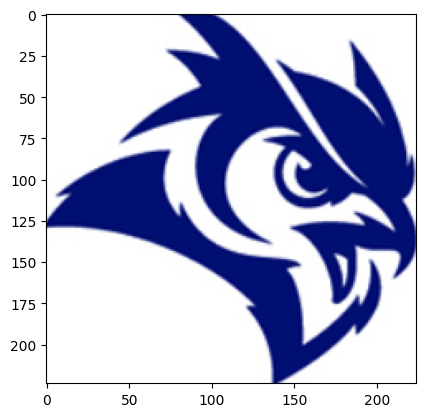

In [ ]:
import matplotlib.pyplot as plt

# Load the input image.
image_url = 'https://www.cs.rice.edu/~vo9/deep-vislang/rice-owl.jpg'
image = Image.open(io.BytesIO(requests.get(image_url).content)).convert('RGB')
#image = Image.open('incognito.jpg').convert('RGB')
pimage = preprocessFn(image)

# Extract the output of VGG-16 at layer 19 given the input image.
feature = model_F(pimage[None, :])

print('feature.shape: ', feature.shape)
# torch.save(feature.detach().data, 'feature-layer-19.p')

plt.imshow(unnormalizeFn(pimage).permute(1, 2, 0))

#### **Recover the original image through image input space optimization**

I have the pre-computed feature tensor for the image here: www.cs.rice.edu/~vo9/deep-vislang/feature-layer-19.p

In [ ]:
!wget -qnc www.cs.rice.edu/~vo9/deep-vislang/feature-layer-19.p

In [ ]:
# Your code and output goes here.

# for step in list(model.state_dict())[::-1]:
#     print(step)
ft = torch.load("feature-layer-19.p")

Streaming output truncated to the last 5000 lines.
********************
Run [8328
tensor(34502.6445, device='cuda:0')
********************
Run [8329
tensor(34551.8867, device='cuda:0')
********************
Run [8330
tensor(34360.8594, device='cuda:0')
********************
Run [8331
tensor(34213.7812, device='cuda:0')
********************
Run [8332
tensor(34213.9258, device='cuda:0')
********************
Run [8333
tensor(34261.5938, device='cuda:0')
********************
Run [8334
tensor(34326.7305, device='cuda:0')
********************
Run [8335
tensor(34530.3438, device='cuda:0')
********************
Run [8336
tensor(34716.9258, device='cuda:0')
********************
Run [8337
tensor(34886.4336, device='cuda:0')
********************
Run [8338
tensor(34968.6680, device='cuda:0')
********************
Run [8339
tensor(34855.2227, device='cuda:0')
********************
Run [8340
tensor(34694.4062, device='cuda:0')
********************
Run [8341
tensor(34463.5703, device='cuda:0')
***********

tensor(31785.7539, device='cuda:0')
********************
Run [9995
tensor(31706.2012, device='cuda:0')
********************
Run [9996
tensor(31593.2773, device='cuda:0')
********************
Run [9997
tensor(31433.5859, device='cuda:0')
********************
Run [9998
tensor(31334.0449, device='cuda:0')
********************
Run [9999
tensor(31162.2773, device='cuda:0')
********************


(-0.5, 447.5, 447.5, -0.5)

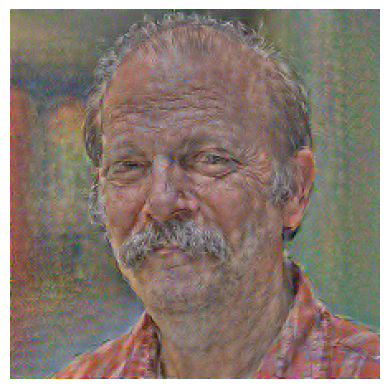

In [ ]:
from tqdm import tqdm
import torchvision

device = "cuda"
# normalize = transforms.Normalize(mean = [0.485, 0.456, 0.406], 
#                             std=[0.229, 0.224, 0.225])

input = torch.zeros(3, 448, 448).normal_(0, 0.25).to(device)
input.requires_grad=True


ft = ft.to(device)
optimizer = torch.optim.AdamW([input], lr = 0.008)
lossfn = torch.nn.MSELoss(reduction='sum')
# lossfn = lambda x, y:  ( \
#     torch.sum(torch.abs(x[:, :, :, :-1] - y[:, :, :, 1:])) + \
#     torch.sum(torch.abs(x[:, :, :-1, :] - y[:, :, 1:, :])) \
# ) # VAE
model = model.to(device)
# input = input.to(device)
feature = feature.to(device)
# newinp = torch.tensor([input, input, input, input, input, input, input, input])
# input = newinp
for epoch in range(10000):
    optimizer.zero_grad()
    predicted = model_F(input[None, ])
    loss = lossfn(predicted, ft.detach())

    loss.backward()
    optimizer.step()
    # print(input)
    # print(predicted.shape)
    print("Run [" + str(epoch))
    print(loss.detach())
    print("*"*20)
plt.imshow(unnormalizeFn(input.cpu().detach()).permute(1, 2, 0))
plt.axis("off")


Streaming output truncated to the last 5000 lines.
tensor(49907.9961, device='cuda:0', grad_fn=<MseLossBackward0>)
********************
Run [2325
tensor(49907.0859, device='cuda:0', grad_fn=<MseLossBackward0>)
********************
Run [2326
tensor(49905.9727, device='cuda:0', grad_fn=<MseLossBackward0>)
********************
Run [2327
tensor(49904.2031, device='cuda:0', grad_fn=<MseLossBackward0>)
********************
Run [2328
tensor(49903.5703, device='cuda:0', grad_fn=<MseLossBackward0>)
********************
Run [2329
tensor(49902.1211, device='cuda:0', grad_fn=<MseLossBackward0>)
********************
Run [2330
tensor(49901.4023, device='cuda:0', grad_fn=<MseLossBackward0>)
********************
Run [2331
tensor(49900.1367, device='cuda:0', grad_fn=<MseLossBackward0>)
********************
Run [2332
tensor(49898.9453, device='cuda:0', grad_fn=<MseLossBackward0>)
********************
Run [2333
tensor(49897.5352, device='cuda:0', grad_fn=<MseLossBackward0>)
********************
Run [2334

Run [3991
tensor(48041.5938, device='cuda:0', grad_fn=<MseLossBackward0>)
********************
Run [3992
tensor(48040.0078, device='cuda:0', grad_fn=<MseLossBackward0>)
********************
Run [3993
tensor(48039.1953, device='cuda:0', grad_fn=<MseLossBackward0>)
********************
Run [3994
tensor(48037.7852, device='cuda:0', grad_fn=<MseLossBackward0>)
********************
Run [3995
tensor(48036.8203, device='cuda:0', grad_fn=<MseLossBackward0>)
********************
Run [3996
tensor(48036.3828, device='cuda:0', grad_fn=<MseLossBackward0>)
********************
Run [3997
tensor(48035.2578, device='cuda:0', grad_fn=<MseLossBackward0>)
********************
Run [3998
tensor(48033.9961, device='cuda:0', grad_fn=<MseLossBackward0>)
********************
Run [3999
tensor(48032.9453, device='cuda:0', grad_fn=<MseLossBackward0>)
********************


(-0.5, 223.5, 223.5, -0.5)

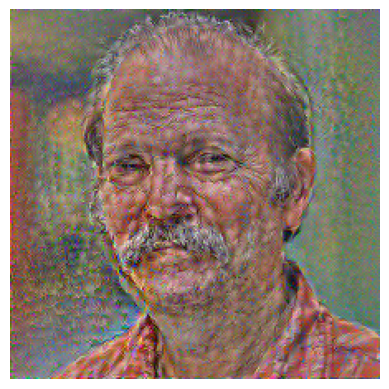

In [ ]:
optimizer = torch.optim.Adam([input], lr = 0.0003)

for epoch in range(10000):
    optimizer.zero_grad()
    predicted = model_F(input[None, ])
    loss = lossfn(predicted, ft.detach())

    loss.backward()
    optimizer.step()
    print("Run [" + str(epoch))
    print(loss)
    print("*"*20)
plt.imshow(unnormalizeFn(input.cpu().detach()).permute(1, 2, 0))
plt.axis("off")


In [ ]:
torch.max(input*255)